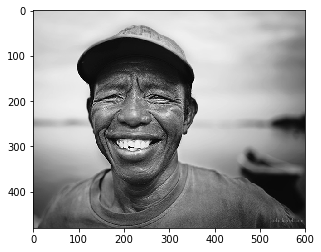

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import and display image with matplot lib
img = cv2.imread('images/smiling-fisherman-kei-island-indonesia.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [2]:
# load face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
# send face through model, with scaleFactor and minNeighbors arguments
faces = face_cascade.detectMultiScale(img, 1.4, 5)

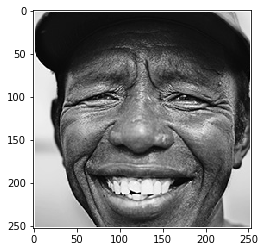

In [4]:
# draw rectangle around the face detected by the model, then crop it
for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img, cmap='gray')

In [5]:
# resize cropped face to 48 by 48 pixels
pixel_img = cv2.resize(crop_img, (48,48))

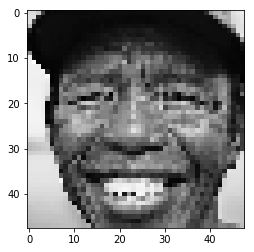

In [6]:
# show pixelated image
plt.imshow(pixel_img, cmap='gray')

In [7]:
# check the shape
pixel_img.shape

(48, 48)

In [8]:
# scale pixels from 0 to 1 (originally from 0 to 255)
def preprocess_input(x):
    x = x.astype('float32')
    x = x / 255.0
    return x

processed = preprocess_input(pixel_img)

In [9]:
processed

array([[ 0.84313726,  0.84313726,  0.7764706 , ...,  0.85882354,
         0.89019608,  0.90588236],
       [ 0.85882354,  0.85882354,  0.13725491, ...,  0.8392157 ,
         0.86274511,  0.89019608],
       [ 0.85882354,  0.29019609,  0.04313726, ...,  0.82745099,
         0.85490197,  0.88235295],
       ..., 
       [ 0.72941178,  0.73725492,  0.74117649, ...,  0.76078433,
         0.75686276,  0.73725492],
       [ 0.71372551,  0.72156864,  0.72941178, ...,  0.7764706 ,
         0.76862746,  0.74509805],
       [ 0.69411767,  0.7019608 ,  0.70980394, ...,  0.49411765,
         0.63137257,  0.72549021]], dtype=float32)

In [10]:
# reshape for model
gray_face = np.expand_dims(processed, 0)
gray_face.shape

(1, 48, 48)

In [11]:
# reshape for model
gray_face = np.expand_dims(gray_face, -1)
gray_face.shape

(1, 48, 48, 1)

In [12]:
# load emotion model
from keras.models import load_model
emotion_classifier = load_model('fer2013_mini_XCEPTION.119-0.65.hdf5')

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [13]:
# predict with emotion model
prediction = emotion_classifier.predict(gray_face)
prediction.shape

(1, 7)

In [14]:
prediction

array([[  1.80676784e-02,   1.49489506e-05,   1.44133940e-02,
          6.17636919e-01,   6.54048994e-02,   9.31206811e-03,
          2.75150120e-01]], dtype=float32)

In [15]:
# check below for emotion label
np.argmax(prediction)

3

In [16]:
# emotion_labels = {
#     0: 'angry',
#      1: 'disgust',
#      2: 'fear',
#      3: 'happy',
#      4: 'sad',
#      5: 'surprise',
#      6: 'neutral'
# }